# Setup: OpenCV

For this assignment you will need to use a popular and powerful library known as [OpenCV](https://opencv.org/). To do this on hub, you will need to open a terminal (File->New Launcher->Terminal) and enter `pip install opencv-python`. If you are trying to run the notebook somewhere else and can't figure out how to install the library, ask on piazza and provide details.

# Assignment: Solving Image Maze 

Given a maze as an image with a start and end point, we would like to write code to solve the maze. 

An image is a 2D matrix of pixels of a particular size that depends on its resolution. Each 
pixel has a color which is given by its Red, Green and Blue (RGB) values.
 
Given an image, we will view it as a graph where each pixel of the image is a vertex 
and edges connect a pixel to its neighbor. The weight of an edge should be very small if
the pixel colors are similar (i.e, the differences between r, g and b values are close to zero)
and correspondingly large as the pixel colors diverge.
  
Next, given a source pixel $(i_0, j_0)$ and destination pixel, 
$(i_1, j_1)$, we wish find the shortest weight path from source to destination.

You should use the Dijkstra's algorithm modified in two ways:
   - It can exit as soon as the destination is reached.
   - A 1000 x 1000 pixel image gives rise to a graph with million vertices. Storing such a graph as an adjacency list is going to be very memory intensive. Instead, your goal will be to generate the vertices and edges *on-the-fly*.
   
We will use opencv library, a popular computer vision library to load, and manipulate images of mazes.



## Manipulating Images

You can directly manipulate images in python in many ways. The `opencv` library is considered a standard for numerous
image manipulation tasks.

Here we load an image `maze.png` and you can see it nicely plotted with coordinates. We then show you two pixels
shown in red and blue. The goal here is to detect a path from one of the colored circle to the other, in the maze without crossing
the black pixels.

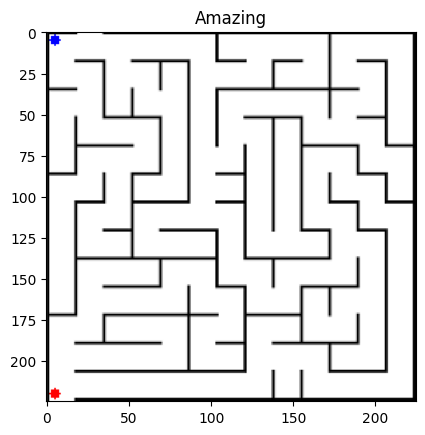

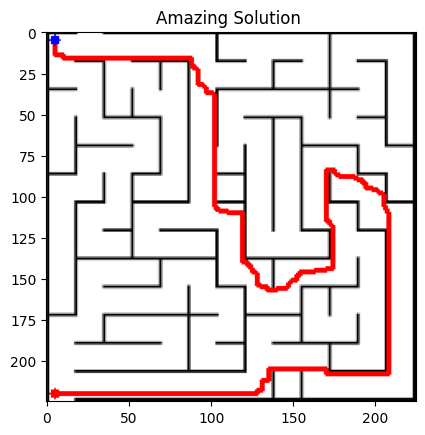

In [1]:
from matplotlib import pyplot as plt
import cv2
# You can read png, jpg and other file types 
img = cv2.imread('maze.png') # read an image from a file using opencv (cv2) library
# you can annotate images 
cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle centered at (5, 220) radius 3, color red (RGB: 255,0,0)
cv2.circle(img, (5,5), 3, (0,0,255), -1) # add a circle centered at (5,5) radius 3, color red (RGB: 0,0,255)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing')
plt.show()

img = cv2.imread('maze-solution.png') # read an image from a file using opencv (cv2) library
# you can annotate images 
cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle centered at (5, 220) radius 3, color red (RGB: 255,0,0)
cv2.circle(img, (5,5), 3, (0,0,255), -1) # add a circle centered at (5,5) radius 3, color red (RGB: 0,0,255)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing Solution ')
plt.show()


Given an image it is simple to read the color at a pixel. Let us read the color at pixel (645, 67)

In [2]:
print('Image size (height, width, num layers) is', img.shape)
px = img[145, 67] # img[y,x] is the color of the pixel of x,y
print(px)

cv2.circle(img, (80, 18), 3, (198,31,4),-1) # Draw a colored circle centered at (80, 18)
px1 = img[18, 80] # It is important to note that rows of the image are y values and columns are x values.
print(px1)

px2 = img[80, 18] # This is important to note that indexing the img data structure takes y, x values.
# Most opencv functions will require (x,y) coordinates for pixel as is natural.
print(px2)

Image size (height, width, num layers) is (225, 225, 3)
[255 255 255]
[198  31   4]
[0 0 0]


The pixel color is expressed in RGB format. R is the red value from 0 -> 255, G is the green value 0 -> 255 and B is the blue value from 0 -> 255 

We will now define a edge weight function for an edge in the image

In [3]:
import math 
def fixPixelValues(px):
    # convert the RGB values into floating point to avoid an overflow that will give me wrong answers
    return [ float(px[0]), float(px[1]), float(px[2]) ]

## Given (x,y) coordinates of two neighboring pixels, calculate the edge weight.
# We take the squared euclidean distance between the pixel values and add 0.1
def getEdgeWeight(img, u, v):
    # get edge weight for edge between u, v
    # First make sure that the edge is legit
    i0,j0 = u[0], u[1]
    i1,j1 = v[0], v[1]
    height, width, _ = img.shape
    assert i0 >= 0 and j0 >= 0 and i0 < width and j0 < height # pixel position valid?
    assert i1 >= 0 and j1 >= 0 and i1 < width and j1 < height # pixel position valid?
    assert -1 <= i0 - i1 <= 1 # edge between node and neighbor?
    assert -1 <= j0 - j1 <= 1
    px1 = fixPixelValues(img[j0,i0])
    px2 = fixPixelValues(img[j1,i1])
    return 0.1 + (px1[0] - px2[0])**2 + (px1[1] - px2[1])**2 + (px1[2]- px2[2])**2
    
# This is a useful function that given a list of (x,y) values, 
# draw a series of red lines between each coordinate and next to 
# show the path in the image
def drawPath(img, path, pThick=2):
    v = path[0]
    x0, y0 = v[0], v[1]
    for v in path:
        x, y = v[0], v[1]
        cv2.line(img,(x,y), (x0,y0), (255,0,0),pThick)
        x0, y0 = x,y
        

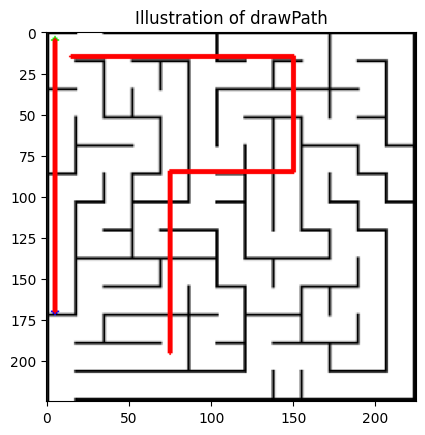

[255 255 255]
0.1


In [4]:
# Example
img = cv2.imread('maze.png') # read an image from a file using opencv (cv2) library
drawPath(img, [ (15, 15), (150, 15), (150, 85), (75, 85), (75, 195)])
u1 = (1,3)
v1 = (1,4)
u2 = (5,5)
v2 = (5, 170)
u3, v3 = (5,5) , (250,250)
cv2.circle(img, u2, 2, (0,255,0), -1)
cv2.circle(img, v2, 2, (0,0,255), -1)
drawPath(img, [u2, v2])
plt.imshow(img) # show the image on the screen 
plt.title('Illustration of drawPath')
plt.show()
px1 = img[100,100]
print(px1)
u4, v4 = (5, 174), (5,175)
print(getEdgeWeight(img, u4, v4))




## Step 1: Compute Single Source Shortest Path For an Image

Given an image, compute the  shortest path between source and destination pixels by modifying Dijkstra's algorithm. __Your challenge  is to implement it without needing to create the entire the adjacency list for the graph
in the first place. However, for simplicity you can try a first cut implementation of a generic Dijkstra algorithm over
graphs represented as adjacency matrix or list.__ 

In [5]:
class Vertex: # This is the outline for a vertex data structure
    def __init__ (self,  i, j):
        self.x = i # The x coordinate
        self.y = j  # The y coordinate
        self.d = float('inf') # the shortest path estimate
        self.processed = False # Has this vertex's final shortest path distance been computed
        self.idx_in_priority_queue = -1 # The index of this vertex in the queue
        self.pi = None # the parent vertex.
    
        
# Dijkstra's algorithm requires a priority queue so that the 
# minimum weight vertex can be found efficiently.
# However, we provide you with a list data structure as a stand in for priority queue

class SimpleQueue: 
    # CONSTRUCTOR
    def __init__(self): 
        self.q = []

    # get length (just testing this out, seeing how it works)
    def length(self):
        n = len(self.q)
        return n
    # Insert a vertex into the queue
    def insert(self, v):
        v.idx_in_priority_queue = len(self.q)
        self.q.append(v)
        
    # Find the vertex with the smallest distance estimate, and 
    # delete it from the queue
    # return the vertex
    def get_and_delete_min(self):
        n = len(self.q)
        assert n > 0
        min_pos = 0
        for i in range(n):
            if self.q[i].d < self.q[min_pos].d:
                min_pos = i
        v = self.q[min_pos]
        del self.q[min_pos]
        return v
    
    # Is the queue empty?
    def is_empty(self):
        return len(self.q) == 0
    
    # Notify the queue that the weight of vertex v has been updated.
    def update_vertex_weight(self, v):
        pass # Nothing to do, for a simple list, we ignore this notification.
    


In [6]:
# However, if you want Dijkstra efficiently, 
# you may want to implement a priority queue.
# We provide you the signature for a priority queue.
# Feel free to implement extra functions if you wish

class PriorityQueue:
    # Constructor: 
    def __init__(self):
        self.heap = []
    


    
    def insert(self, v):
        v.idx_in_priority_queue = len(self.heap)
        self.heap.append(v)
        self.bubble_up(v.idx_in_priority_queue)
        


    def get_and_delete_min(self):
        if len(self.heap) != 0:
            min_vert = self.heap[0]
            last_vert = self.heap.pop()

            if self.heap:
                self.heap[0] = last_vert                     # swap first and last
                last_vert.idx_in_priority_queue = 0
                self.bubble_down(0)

            min_vert.idx_in_priority_queue = -1
            return min_vert
        return None
        
            
    def is_empty(self):
        return len(self.heap) == 0

        
    def update_vertex_weight(self, v):
        i = v.idx_in_priority_queue
        self.bubble_up(i)
        
    def bubble_up(self, i):
        while i > 0:
            p = (i - 1) // 2
            if self.heap[i].d < self.heap[p].d:
                self.swap(i, p)
                i = p
            else:
                break
    
    def bubble_down(self, i):
        size = len(self.heap)
        while True:
            left = 2 * i + 1
            right = 2 * i + 2
            smallest = i
            if left < size and self.heap[left].d < self.heap[smallest].d:
                smallest = left
            if right < size and self.heap[right].d < self.heap[smallest].d:
                smallest = right
            if smallest != i:
                self.swap(i, smallest)
                i = smallest
            else:
                break

    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        self.heap[i].idx_in_priority_queue = i
        self.heap[j].idx_in_priority_queue = j


# pq = PriorityQueue()
# v1 = Vertex(0, 0)
# v2 = Vertex(1, 1)
# v3 = Vertex(2, 2)
# v1.d = 10
# v2.d = 5
# v3.d = 7
# pq.insert(v1)
# pq.insert(v2)
# pq.insert(v3)

# min_v = pq.get_and_delete_min()
# print("Min:", (min_v.x, min_v.y)) 
# v1.d = 3
# pq.update_vertex_weight(v1)
# min_v = pq.get_and_delete_min()
# print("New min:", (min_v.x, min_v.y)) 


In [17]:
def in_bounds(img, v):
    height, width, _ = img.shape
    i, j = v
    return 0 <= i < width and 0 <=j < height

def getNeighbors(img, v):

    x,y = v.x, v.y

    neighbor_array = []
    for d_x, d_y in [(1, 0), (0,1), (-1,0), (0,-1)]:
        new_x, new_y = x + d_x, y + d_y
        if in_bounds(img, (new_x, new_y)):
            neighbor_array.append((new_x, new_y))



    return neighbor_array


def computeShortestPath(img, source, dest):
    # IMPLEMENT DIJKSTRA
    path = [source, dest]
    known_verts = {}
    # set weight of source to zero
    source_x, source_y = source
    start = Vertex(source_x, source_y)
    start.d = 0
    known_verts[(source_x, source_y)] = start


    q = PriorityQueue()
    q.insert(start)

    MAX_STEPS = 100_000
    step = 0
    while not q.is_empty() and step < MAX_STEPS:
        step += 1
        current = q.get_and_delete_min()
        cx, cy = current.x, current.y

        if current.processed:              # already seen it
            # print("processed!")
            continue
        if (cx, cy) == dest:
            print("End!")        # reached the end
            break
        current.processed = True

        for nx, ny in getNeighbors(img, current):

            print(nx, ny)

            neighbor_verts = (nx, ny)

            if neighbor_verts not in known_verts:                          # check if we've seen this vertex
                known_verts[neighbor_verts] = Vertex(nx, ny)               # if not, create it and add it to the known verts dictionary
            neighbor = known_verts[neighbor_verts]

            if neighbor.processed:                                         # check if we've already seen it AND its already been processed
                continue
                
            w = getEdgeWeight(img, (cx, cy), (nx, ny))                     # get edge weight from current to neighbor
            if current.d + w < neighbor.d:
                neighbor.d = current.d + w                                 # update neighbor weight if necessary
                neighbor.pi = current     
                
                if neighbor.idx_in_priority_queue == -1:
                    q.insert(neighbor) 
                else:                               
                    q.update_vertex_weight(neighbor)                                         # insert nighbor into priority queue
    
    if step >= MAX_STEPS:
        print("Hit step limit")

    print(f'STeps: {step}')
    path = []
    if dest in known_verts:
        print("Destination was reached!")
    else:
        print("Destination was NOT reached. Path will be empty.")
    current = known_verts.get(dest)
    while current:
        path.append((current.x, current.y))
        current = current.pi

    return path


# img = cv2.imread('maze.png')
# start = (5,5)
# end = (5,20)
# print(computeShortestPath(img, start, end))

    # n1 = (x+1, y)
    # n2 = (x, y+1)
    # n3 = (x-1, y)
    # n4 = (x, y-1)

    # return Vertex(n1), Vertex(n2), Vertex(n3), Vertex(n4)

# start = (5,20)
# source = Vertex(start)





# myq = SimpleQueue()
# v1 = Vertex(20,5)
# v2 = Vertex(100,150)
# v3 = Vertex(40,130)
# v3.d = 3
# myq.insert(v1)
# myq.insert(v2)
# myq.insert(v3)
# print(myq.length())
# ret = myq.get_and_delete_min()
# print(ret.x, ret.y)



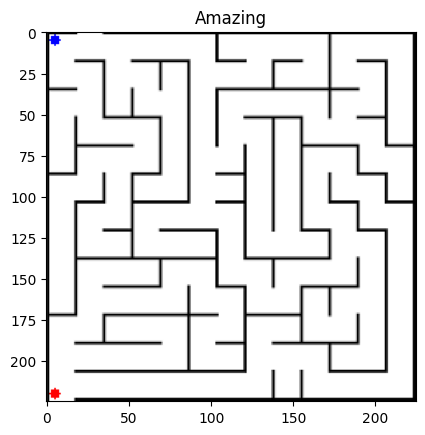

In [12]:
img = cv2.imread('maze.png') # read an image from a file using opencv (cv2) library
# you can annotate images 
cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle centered at (5, 220) radius 3, color red (RGB: 255,0,0)
cv2.circle(img, (5,5), 3, (0,0,255), -1) # add a circle centered at (5,5) radius 3, color red (RGB: 0,0,255)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing')
plt.show()

In [15]:
img = cv2.imread('maze.png') # read an image from a file using opencv (cv2) library
p = computeShortestPath(img, (5,220), (5,5))

print("Path length:", len(p))
print("poinst...:", p[:5])

6 220
5 221
4 220
5 219
7 220
6 221
5 220
6 219
6 219
5 220
4 219
5 218
6 221
5 222
4 221
5 220
5 220
4 221
3 220
4 219
5 221
4 222
3 221
4 220
4 220
3 221
2 220
3 219
7 219
6 220
5 219
6 218
8 220
7 221
6 220
7 219
7 221
6 222
5 221
6 220
6 218
5 219
4 218
5 217
5 219
4 220
3 219
4 218
6 222
5 223
4 222
5 221
5 218
4 219
3 218
4 217
6 223
5 224
4 223
5 222
7 218
6 219
5 218
6 217
4 221
3 222
2 221
3 220
5 222
4 223
3 222
4 221
3 220
2 221
1 220
2 219
4 219
3 220
2 219
3 218
8 219
7 220
6 219
7 218
9 220
8 221
7 220
8 219
6 217
5 218
4 217
5 216
8 221
7 222
6 221
7 220
7 222
6 223
5 222
6 221
8 222
7 223
6 222
7 221
10 220
9 221
8 220
9 219
7 217
6 218
5 217
6 216
5 217
4 218
3 217
4 216
9 219
8 220
7 219
8 218
5 223
4 224
3 223
4 222
3 219
2 220
1 219
2 218
3 221
2 222
1 221
2 220
4 222
3 223
2 222
3 221
6 216
5 217
4 216
5 215
4 218
3 219
2 218
3 217
7 223
6 224
5 223
6 222
9 221
8 222
7 221
8 220
6 224
4 224
5 223
8 218
7 219
6 218
7 217
4 217
3 218
2 217
3 216
8 217
7 218
6 217
7 2

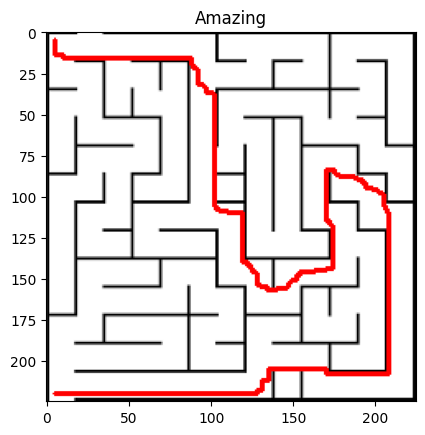

True

In [18]:
drawPath(img, p, 2)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing')
plt.show()
cv2.imwrite('maze-solution.png', img)

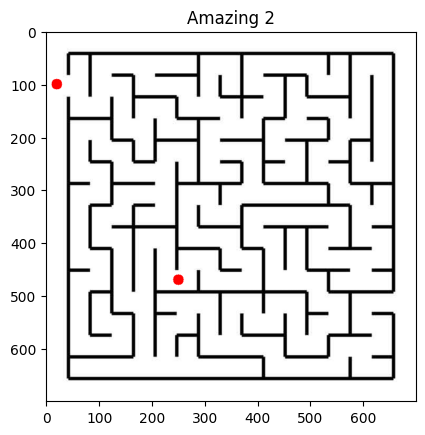

In [19]:
img = cv2.imread('maze2.JPG') # read an image from a file using opencv (cv2) library
cv2.circle(img,(250,470), 10, (255,0,0), -1) # add a circle centered at (600, 70) radius 10, color red (RGB: 255,0,0)
cv2.circle(img, (20,100), 10, (255,0,0), -1) # add a circle centered at (790,200) radius 10, color red (RGB: 255,0,0)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing 2')
plt.show()

In [ ]:
img = cv2.imread('maze2.JPG') # read an image from a file using opencv (cv2) library
p = computeShortestPath(img, (250,470), (20,100))

251 470
250 471
249 470
250 469
252 470
251 471
250 470
251 469
251 469
250 470
249 469
250 468
251 471
250 472
249 471
250 470
250 470
249 471
248 470
249 469
250 471
249 472
248 471
249 470
249 470
248 471
247 470
248 469
252 469
251 470
250 469
251 468
253 470
252 471
251 470
252 469
252 471
251 472
250 471
251 470
251 468
250 469
249 468
250 467
250 469
249 470
248 469
249 468
251 472
250 473
249 472
250 471
250 468
249 469
248 468
249 467
251 473
250 474
249 473
250 472
252 468
251 469
250 468
251 467
249 471
248 472
247 471
248 470
250 472
249 473
248 472
249 471
248 470
247 471
246 470
247 469
249 469
248 470
247 469
248 468
253 469
252 470
251 469
252 468
254 470
253 471
252 470
253 469
251 467
250 468
249 467
250 466
253 471
252 472
251 471
252 470
252 472
251 473
250 472
251 471
253 472
252 473
251 472
252 471
255 470
254 471
253 470
254 469
247 470
246 471
245 470
246 469
252 467
251 468
250 467
251 466
250 467
249 468
248 467
249 466
250 473
249 474
248 473
249 472
248 469


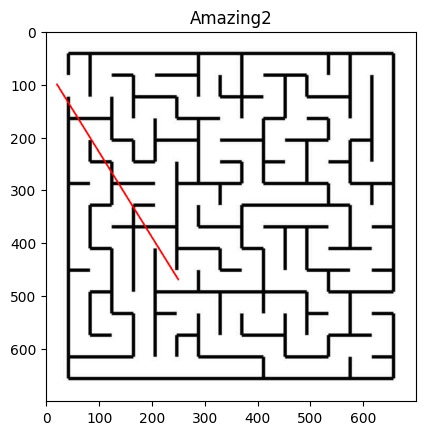

In [ ]:
drawPath(img,p)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing2')
plt.show()

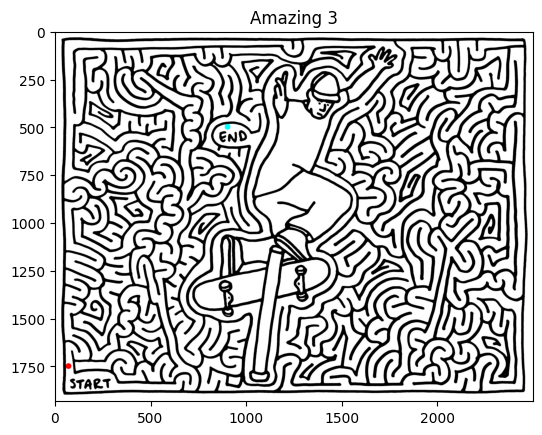

In [ ]:
img = cv2.imread('maze3.JPG')
cv2.circle(img,(70,1750), 15, (255,0,0), -1) # add a circle centered at (600, 70) radius 10, color red (RGB: 255,0,0)
cv2.circle(img, (900,500), 15, (0,255,255), -1) # add a circle centered at (790,200) radius 10, color red (RGB: 255,0,0)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing 3')
plt.show()

In [ ]:
img = cv2.imread('maze3.JPG') # read an image from a file using opencv (cv2) library
p = computeShortestPath(img, (70,1750), (900,500))

(70, 1750)
71 1750
70 1751
69 1750
70 1749


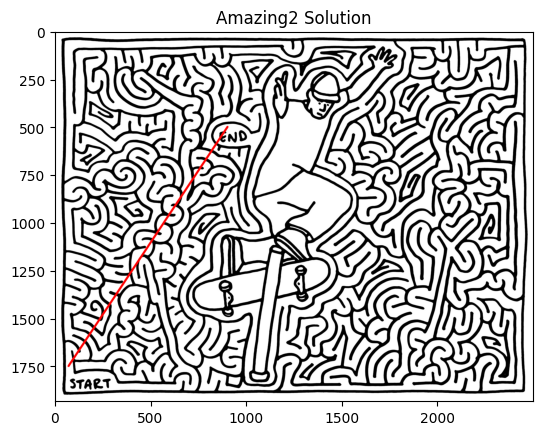

In [ ]:
drawPath(img,p,10)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing2 Solution')
plt.show()